In [1]:
%cd ..

/home/ubuntu/dev/edge/py-edge-eval


Testing nms

In [2]:
import os.path as osp

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [4]:
from pyEdgeEval import nms
from pyEdgeEval.utils.toolbox import conv_tri, grad2

In [5]:
%matplotlib inline
# %matplotlib widget

In [38]:
def nms_process_one_image(image):
    """"
    :param image: numpy array, edge, model output
    :return: edge
    NOTE: in MATLAB, uint8(x) means round(x).astype(uint8) in numpy
    """
    edge = conv_tri(image, 1)
    ox, oy = grad2(conv_tri(edge, 4))
    oxx, _ = grad2(ox)
    oxy, oyy = grad2(oy)
    ori = np.mod(np.arctan(oyy * np.sign(-oxy) / (oxx + 1e-5)), np.pi)
    r, s, m = 1, 5, float(1.01)
    out = nms(edge, ori, r=r, s=s, m=m)
    edge = np.round(out * 255).astype(np.uint8)
    return edge

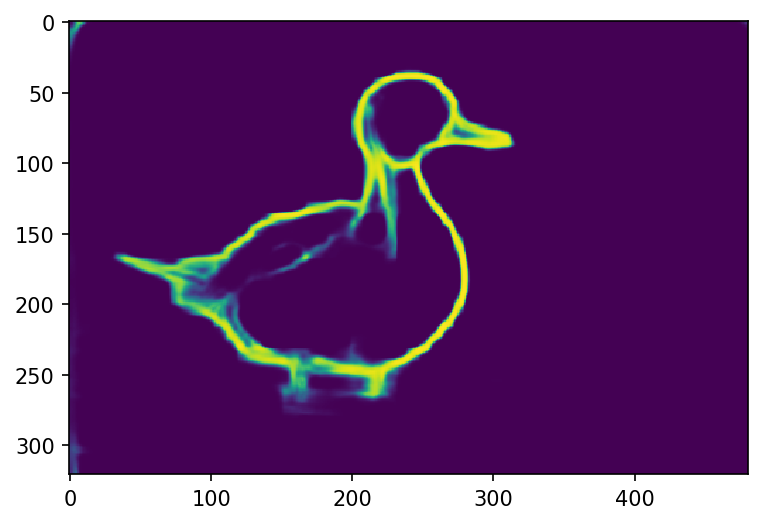

In [39]:
# image for testing
ROOT = "data"
img_name = "43051"

org_fn = osp.join(ROOT, "images", img_name, f"{img_name}_dsn6.png")
# org = Image.open(org_fn)
# org.show()

org = cv2.imread(org_fn, cv2.IMREAD_GRAYSCALE)
im_org = np.asarray(org).astype(float) / 255
plt.imshow(im_org, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

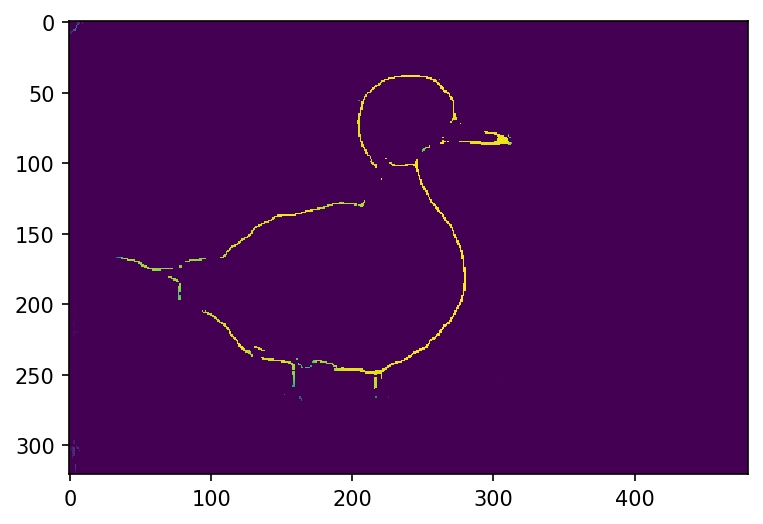

In [40]:
im_nms = nms_process_one_image(im_org)
plt.imshow(im_nms, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()